In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
print(data)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will í_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [18]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

print("Data preprocessed successfully.")
print(data.head())


Data preprocessed successfully.
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [19]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

print("Data split into training and test sets successfully.")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Data split into training and test sets successfully.
Training set size: 4457
Test set size: 1115


In [20]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("Data vectorized using TF-IDF successfully.")
print(f"Number of features: {X_train_tfidf.shape[1]}")

Data vectorized using TF-IDF successfully.
Number of features: 7465


In [40]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

print("Naive Bayes model trained successfully.")
y_pred = nb_classifier.predict(X_test_tfidf)

print("Predictions made successfully.")

Naive Bayes model trained successfully.
Predictions made successfully.


In [23]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Model Accuracy: 0.9668
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [28]:
# Save the Naive Bayes classifier and TF-IDF vectorizer
joblib.dump(nb_classifier, 'spam_classifier.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully.")


Model and vectorizer saved successfully.


In [29]:
loaded_classifier = joblib.load('spam_classifier.pkl')
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

sample_message = ["Free entry in 2 a weekly competition to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)"]
sample_message_tfidf = loaded_vectorizer.transform(sample_message)
prediction = loaded_classifier.predict(sample_message_tfidf)

print(f"Prediction for sample message: {'Spam' if prediction[0] == 1 else 'Ham'}")

Prediction for sample message: Spam


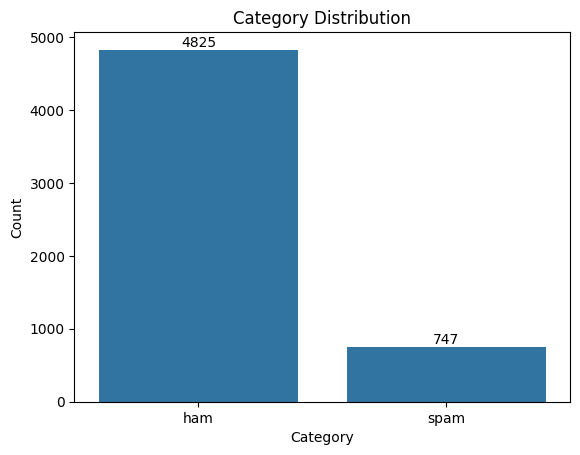

In [36]:
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
for i, count in enumerate(category_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()







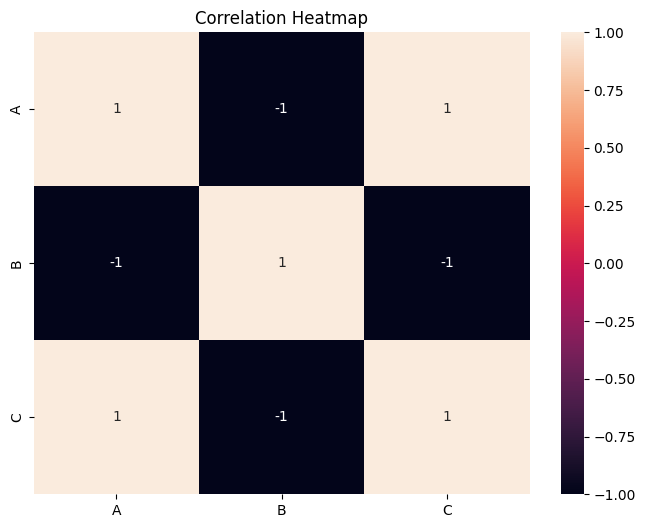

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

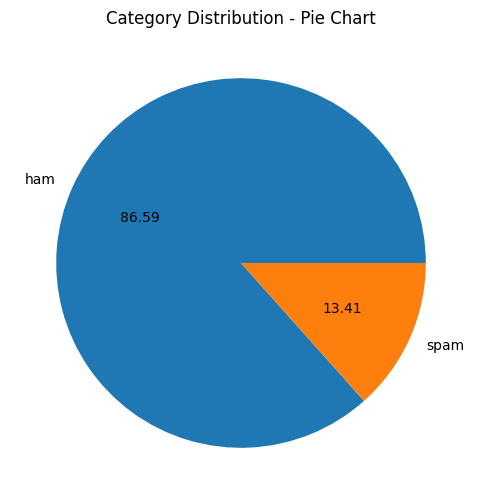

In [38]:
plt.figure(figsize=(6, 6))
plt.pie(data['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.title('Category Distribution - Pie Chart')
plt.show()